In [4]:
# 데이터 구조 형성
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl

# 데이터 분할(train, test)
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
# RandomForest
from sklearn.ensemble import RandomForestRegressor
# GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# 한글 맑은 고딕 적용
mpl.rc("font", family = "Malgun Gothic")
# 음수값 표시
mpl.rc('axes', unicode_minus = False)

In [7]:
# RMSE: root mean squared error 함수 => 작을수록 좋음 => 추정모형의 예측 정확도
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
# MAPE: mean absolute percentage error 함수 
# MAPE = 예측정확도 = 0에 가까울수록 모델과 실제가 정확하다는 것 = 0이면 모형 예측 매우 정확 = 실측치,예측치 같음

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

In [8]:
# 파일명, 변수, 값 등에 한글 포함시 encoding=“euc-kr" 지정 
df_raw = pd.read_csv("../data/body.csv")
df_raw.head()

# 목표변수, 설명변수 분리
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

# 학습용/평가용 데이터 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234) 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234)
 
print("학습용 데이터 : {}".format(df_train.shape))
print("평가용 데이터 : {}".format(df_test.shape))

print("학습용 X 데이터 : {}".format(df_train_x.shape))
print("학습용 Y 데이터 : {}".format(df_train_y.shape))
print("평가용 X 데이터 : {}".format(df_test_x.shape))
print("평가용 Y 데이터 : {}".format(df_test_y.shape))

학습용 데이터 : (176, 14)
평가용 데이터 : (76, 14)
학습용 X 데이터 : (176, 13)
학습용 Y 데이터 : (176,)
평가용 X 데이터 : (76, 13)
평가용 Y 데이터 : (76,)


In [10]:
# 4개의 모델을 만듦

# 회귀 모델
lr_model = smf.ols(formula="FAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST", data = df_train)
lr_result = lr_model.fit()

# Decision Tree
dt_model = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, 
                                 max_depth = 6, random_state=1234)
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=8,min_samples_split = 2, 
                                 min_samples_leaf = 4, random_state=1234)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4,  
                                                    min_samples_leaf = 6, random_state=1234)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=6, random_state=1234)

In [43]:
# 모델 리스트, 그래프를 그리기 생성 목적
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

- 선형 회귀 모델 

In [44]:
# 예측
lr_y_pred = lr_result.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))


- 의사결정 나무 모델

In [45]:
# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))


- Random Forest 모델

In [46]:
# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

- 그래디언트 부스팅 모델 

In [47]:
# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

- 평가 결과 시각화 

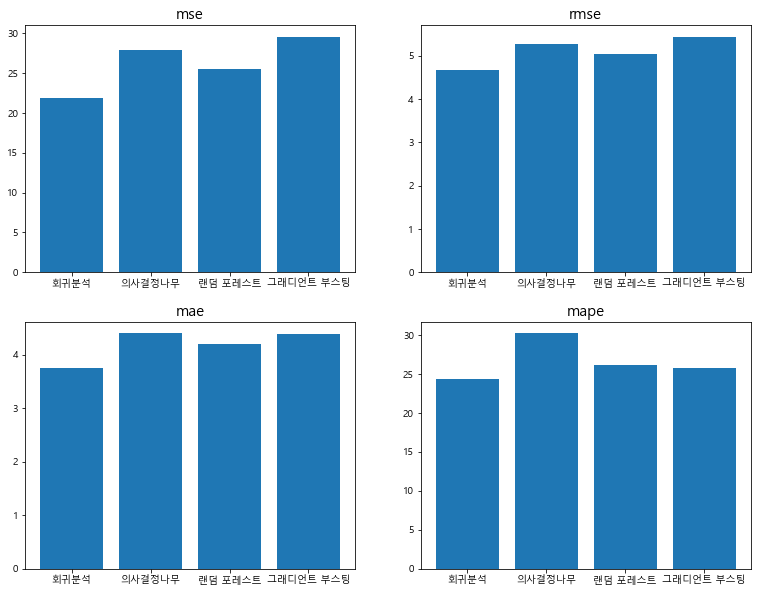

In [49]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)